In [6]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Numeric_Social_Media_Usage_Data.csv')

In [3]:
df

,age,income,gender,time_spent,preferred_platform,interests,demographics,posts_per_week,exercise_hours
0,51,94413,1,4.5,0,0,0,7,5.5
1,64,87851,1,1.0,0,1,1,14,8.0
2,41,68087,1,4.5,1,2,2,1,10.0
3,27,30988,0,5.0,1,3,1,3,7.0
4,55,79214,2,1.0,1,0,2,11,4.5
...,...,...,...,...,...,...,...,...,...
1995,32,45309,0,5.0,4,2,0,3,9.5
1996,34,33802,0,1.0,0,1,1,6,5.0
1997,23,27369,0,3.5,3,3,0,6,2.0
1998,39,61083,1,2.5,3,1,0,11,0.0


In [16]:
scores = {}
clusters = len(df)
for i in range(2, clusters):
    agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    agg = agg.fit(df)
    ss_avg = silhouette_score(df, agg.labels_)
    scores[ss_avg] = i

In [18]:
max_score = max(scores)
max_score

0.5902116733381131

In [19]:
optimal_cluster = scores[max_score]
optimal_cluster

442

In [4]:
agg = AgglomerativeClustering(n_clusters=442, affinity='euclidean', linkage='ward')
agg = agg.fit(df)
cluster_labels = agg.fit_predict(df)
sil_score = silhouette_score(df, cluster_labels)
sil_score

C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\17202\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.5902116733381131

Cluster Summary:
                age        income    gender  time_spent  preferred_platform  \
Cluster                                                                      
0        40.083333  50122.333333  0.416667    3.250000            1.416667   
1        59.333333  81862.666667  0.666667    3.333333            1.333333   
2        16.777778  18507.777778  0.666667    3.111111            1.000000   
3        48.625000  61159.000000  0.625000    2.875000            1.375000   
4        19.818182  22031.909091  0.545455    2.636364            1.727273   
...            ...           ...       ...         ...                 ...   
437      42.200000  57843.800000  0.800000    2.700000            1.600000   
438      62.000000  45405.333333  0.666667    2.166667            1.666667   
439      54.000000  91125.000000  1.000000    2.500000            0.000000   
440      50.000000  72977.666667  0.666667    2.166667            2.333333   
441      32.333333  35075.333333  0.666667    

C:\Users\17202\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


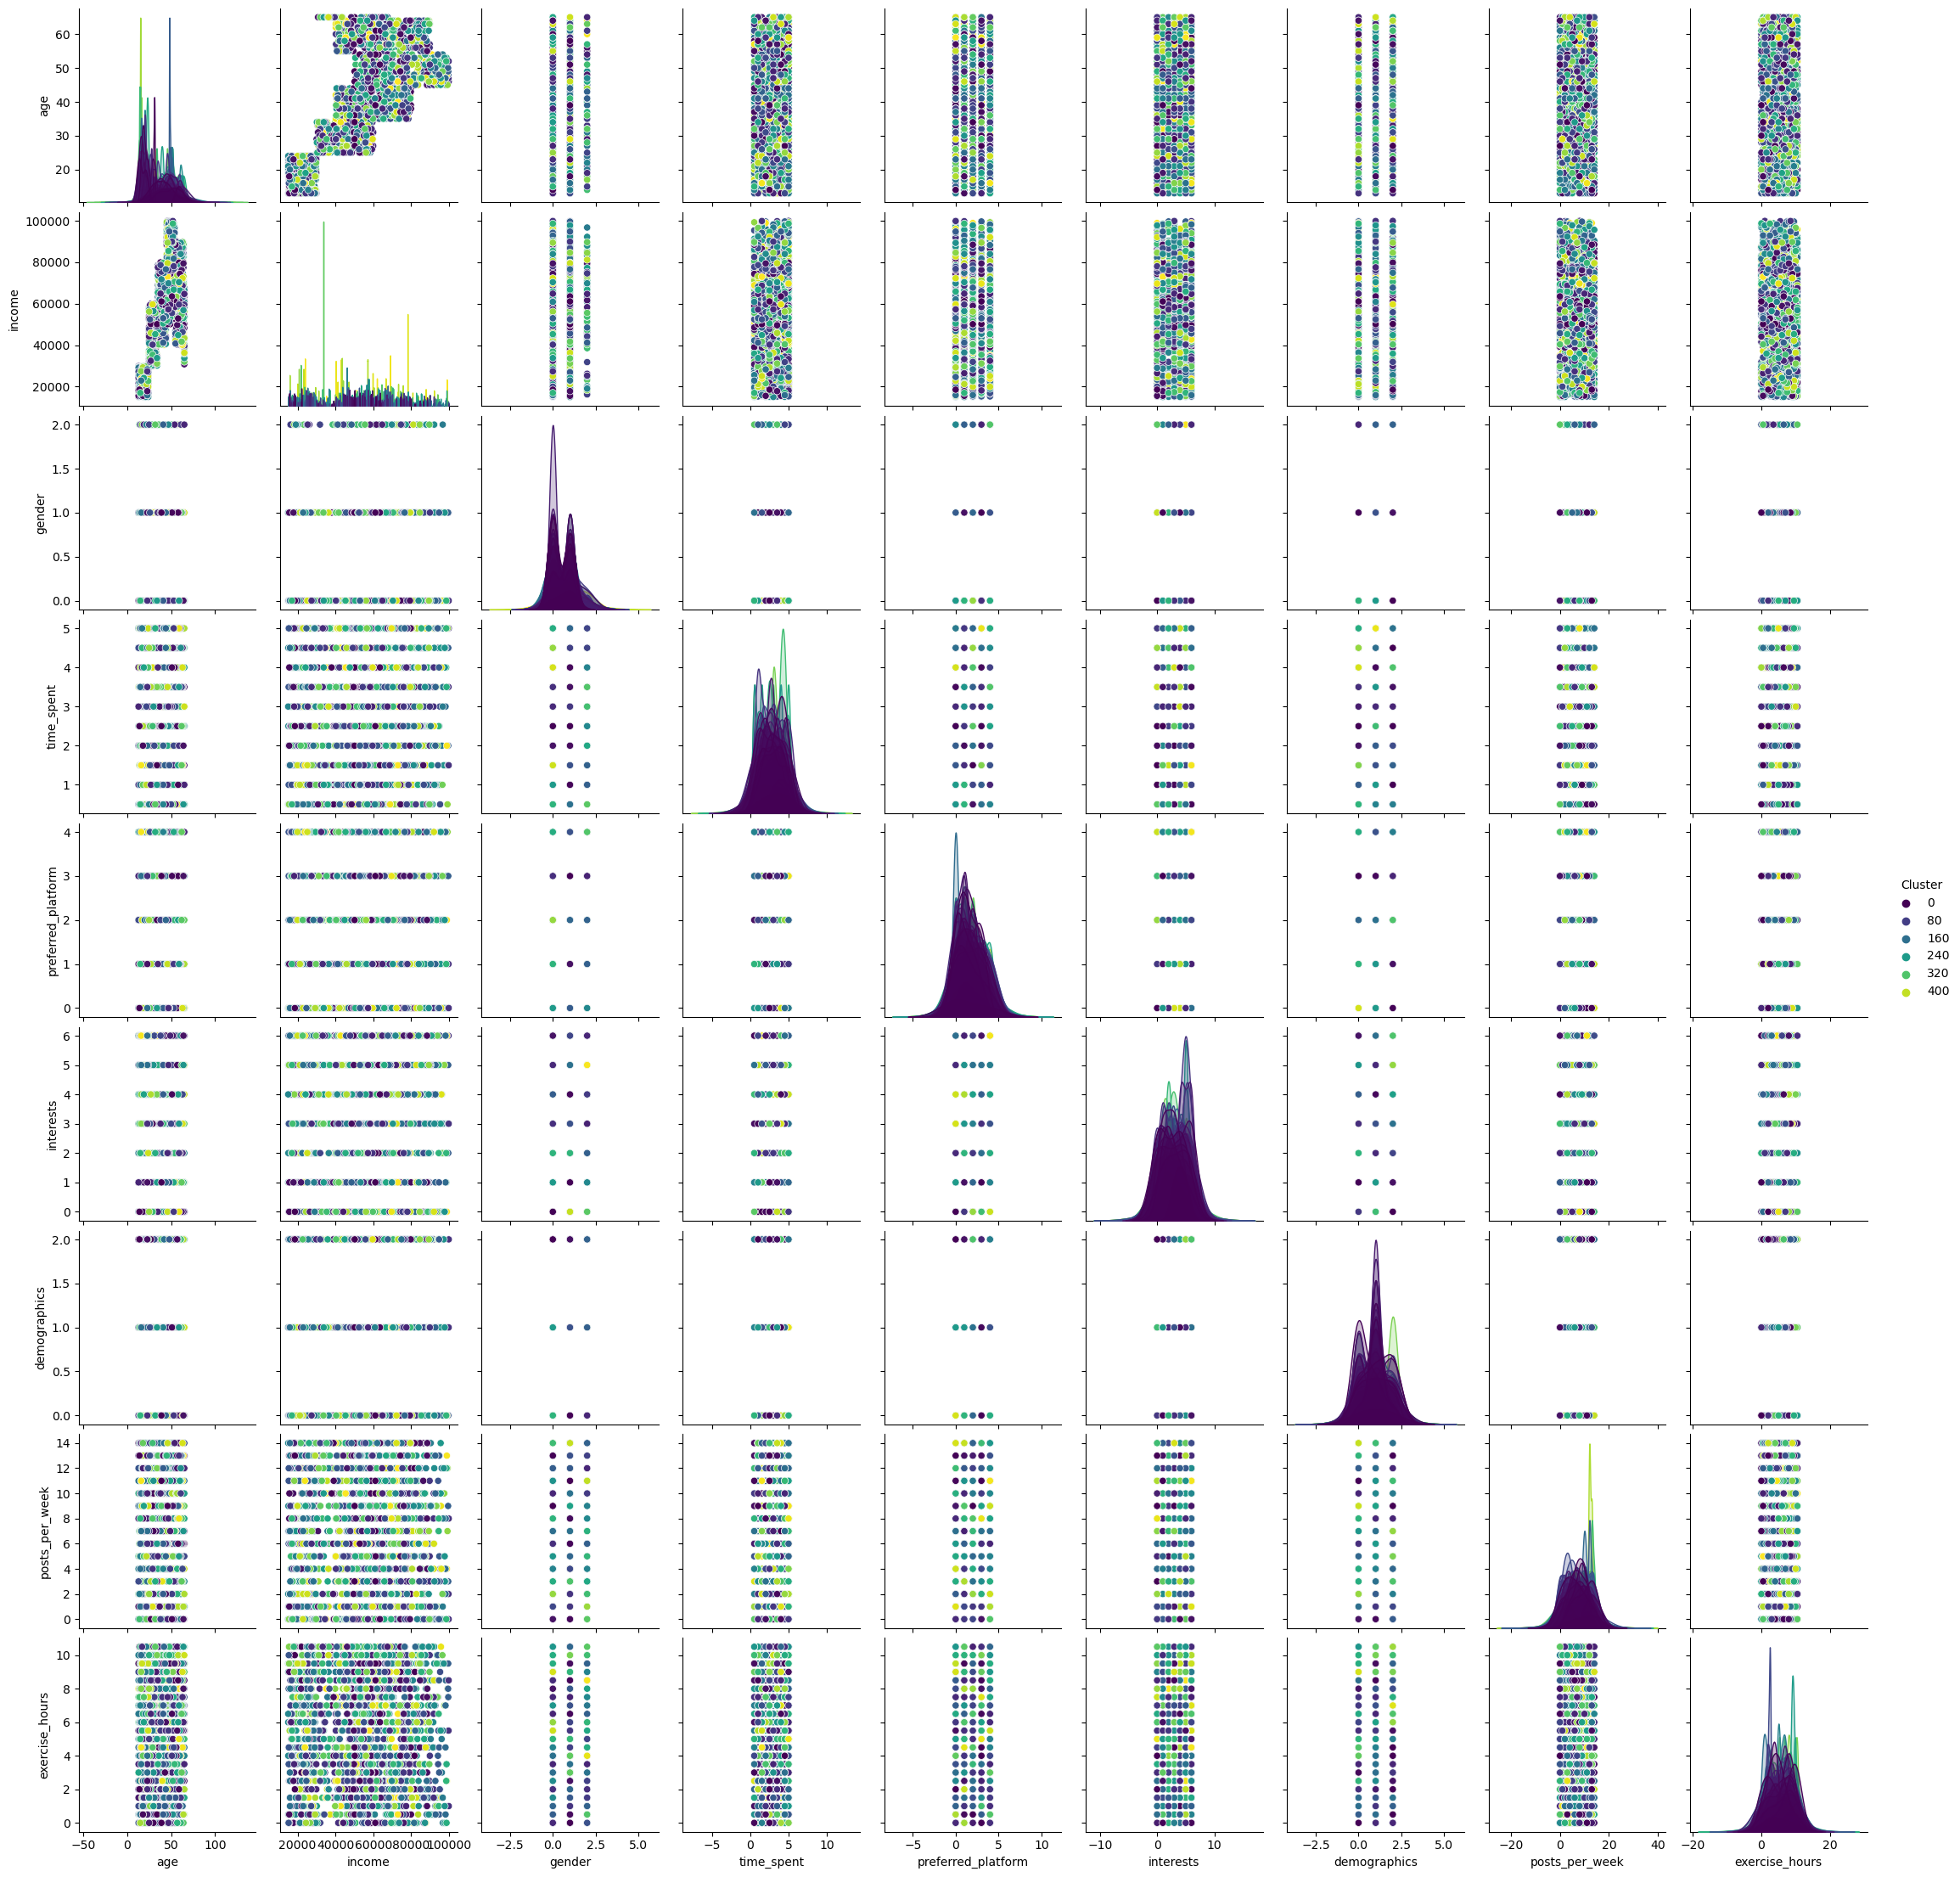

ValueError: Could not interpret value `Age` for parameter `x`

In [7]:
# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Group by clusters and view the mean of each feature
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# Count the number of occurrences of each category within each cluster
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

# Visualize clusters with a pair plot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

# Scatter plot for two features colored by cluster
sns.scatterplot(x='Age', y='Average_Time_Spent', hue='Cluster', data=df, palette='viridis')
plt.show()

# Inspect individual clusters
cluster_0 = df[df['Cluster'] == 0]
print("Cluster 0 Description:\n", cluster_0.describe())

cluster_1 = df[df['Cluster'] == 1]
print("Cluster 1 Description:\n", cluster_1.describe())